<r>15.01.2023 r.<r>
<h1><center>Project - Web Scraping Wiki Dictionary</center></h1>
<h2><center>Analysis of unstructured data</center></h2>

<h3><center>Karol Bieńkowski, Jakub Łuczka, Kacper Paluch</center></h3>

In [14]:
import requests
from bs4 import BeautifulSoup
import time
import pprint
import networkx as nx
import matplotlib.pyplot as plt
import numpy
import json

<h3>Relationship graph of Wiktionary - statistics part of project</h3>

In this notebook we concentrate on looking for the self-loop definitions of the words -> when we start in one word and after search a few or few thousends exploring definitions we return to this word. We applied transitive closure concept to the headwords in the Wiktionary. We also find the uniqueness of the nodes in the realtionship graph by constructing in-degree and out-degree vectors and check sum of in/out-degrees of out/in neighbors of the node.

In [30]:
with open('wiki/got%C3%B3w_na_czyje%C5%9B_ka%C5%BCde_skinienie.json', 'r') as f:
    content = f.read()
print(content)

{"definitions": {"(1.1) \u2192 ": {"type": "zwi\u0105zek frazeologiczny", "def.": ["<a href=\"/wiki/by%C4%87_gotowym_na_ka%C5%BCde_czyje%C5%9B_skinienie\" title=\"by\u0107 gotowym na ka\u017cde czyje\u015b skinienie\">by\u0107 gotowym na ka\u017cde czyje\u015b skinienie</a>"]}}, "name": "got\u00f3w na czyje\u015b ka\u017cde skinienie"}


In [15]:
from wordGraphConstruction import constructWordGraph

In [154]:
wordGraph = constructWordGraph()

In [7]:
plt.savefig('wholeGraph.png')
plt.savefig('wholeGraph.svg')

<Figure size 640x480 with 0 Axes>

In [8]:
plt.savefig('wholeGraph.eps')

<Figure size 640x480 with 0 Axes>

In [155]:
pos = nx.spring_layout(wordGraph)
#with open('wordGraphLayout.json', 'r') as f:
#    content = f.read().replace('array', 'np.array')
#pos = eval(content)
#print(content[:100])
#pos = eval(content)

In [162]:
print(len(pos.keys()), len(wordGraph.nodes))

101258 101258


In [173]:
posAr = np.array(list(pos.values()))*1

In [174]:
#np.save('graphLayout',posAr)
#with open('graphLayoutNodes.txt', 'w'):
#    f.write(list)

In [175]:
nx.draw_networkx_nodes(wordGraph, pos=pos, node_size=0.2,alpha=1, node_color = 'black')
nx.draw_networkx_edges(wordGraph, pos=pos,alpha=1, edge_color = 'black', width=0.2)
#plt.xlim([-0.2, 0.2])
#plt.ylim([-0.2, 0.2])
plt.savefig('wholeGraph.png')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002CB1329DC10> (for post_execute):


KeyboardInterrupt: 

In [30]:
position_val = pos.values()

In [33]:
position_val = np.array(list(position_val))

In [37]:
print(position_val[:,0].mean(),position_val[:,1].mean())

7.728844221277538e-09 -4.184096589739884e-09


In [40]:
print(position_val[:,0].min(),position_val[:,1].min())

-0.9052882194519043 -0.9628751277923584


In [61]:
outerWords = []
for key in pos.keys():
    if np.sqrt(np.sum(pos[key]**2)) > 0.5:
        outerWords.append(key)

In [62]:
len(outerWords)

245

In [63]:
outerWords

['/wiki/-%C4%85tko',
 '/wiki/-%C4%99',
 '/wiki/-ko',
 '/wiki/-a',
 '/wiki/-owa',
 '/wiki/-owy',
 '/wiki/-%C3%B3wa',
 '/wiki/-%C3%B3wka',
 '/wiki/a.',
 '/wiki/accusativus',
 '/wiki/A.',
 '/wiki/acanek',
 '/wiki/acan',
 '/wiki/acani',
 '/wiki/waszmo%C5%9B%C4%87_pani',
 '/wiki/acanka',
 '/wiki/acanna',
 '/wiki/waszmo%C5%9B%C4%87_panna',
 '/wiki/aca%C5%84stwo',
 '/wiki/waszmo%C5%9B%C4%87_pa%C5%84stwo',
 '/wiki/acpani',
 '/wiki/adminka',
 '/wiki/admin',
 '/wiki/alfonsiaczek',
 '/wiki/alfonsiak',
 '/wiki/Alfrid',
 '/wiki/Alfred',
 '/wiki/Alfun',
 '/wiki/Alfons',
 '/wiki/amyn',
 '/wiki/amen',
 '/wiki/an-',
 '/wiki/a-',
 '/wiki/ano%C4%87',
 '/wiki/ot%C3%B3%C5%BC',
 '/wiki/Arek',
 '/wiki/Arkadiusz',
 '/wiki/aspani',
 '/wiki/waspani',
 '/wiki/au_rebours',
 '/wiki/%C3%A0_rebours',
 '/wiki/Beatka',
 '/wiki/Beata',
 '/wiki/Bo%C5%BCenka',
 '/wiki/Bo%C5%BCena',
 '/wiki/Brajanek',
 '/wiki/Brajan',
 '/wiki/cdn.',
 '/wiki/ci%C4%85g_dalszy_nast%C4%85pi',
 '/wiki/chill-oucik',
 '/wiki/chill-out',
 '/wiki/

In [32]:
len(content)

99400

<h3>Transitive closure of words and self-loops in the definitions</h3>

In [230]:
with open('wordSprawl.txt', 'r') as f:
    content = f.readlines()

In [231]:
data = []
dataDict = {}
for word in content:
    tup = eval(word.rstrip('\n'))
    dataDict[tup[0]] = tup[1:]
    data.append(tup[1:])


In [232]:
data = np.array(data)

In [233]:
np.where(data[:,0] == data[:,0].max())

(array([13816], dtype=int64),)

In [234]:
sprawls = np.unique(data[:,0])
print(sprawls)

[    0     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    39    40    41    42    43    44    45    46    47
    48    49    50    51    52    53    54    55    56    57    58    59
    60    61    62    63    64    65    66    67    68    69    71    72
    73    74    75    76    78    79    80    81    82    83    84    85
    86    87    88    89    90    91    92    94    95    96    98   100
   102   105   106   107   112   118   119   132   134   144   145   146
   155   190   191   246   247   308 85331 85332 85333 85334 85335 85336
 85337 85338 85339 85340 85341 85343 85345 85347 85349]


In [235]:
content[13816]

"('/wiki/co%C5%9B', 85349, False)\n"

In [236]:
frequencyOfSprawls = (data[:,0].reshape(-1,1) == sprawls.reshape(1,-1)).sum(axis = 0)

Text(0.5, 0.98, 'Transitive closure of words')

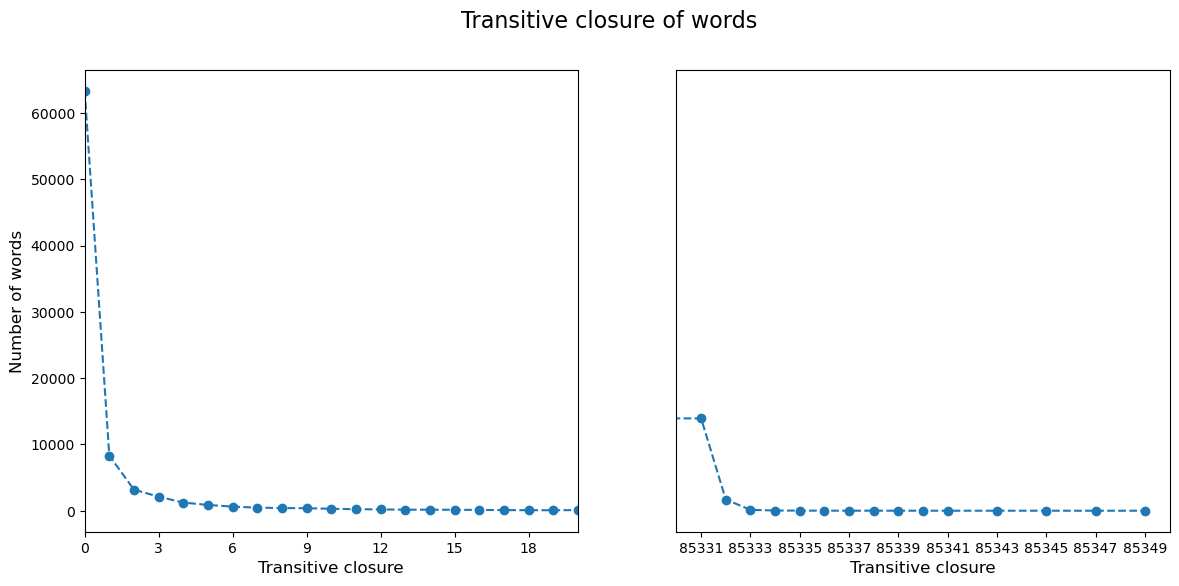

In [263]:
fig, ax = plt.subplots(1, 2, figsize = (14,6))
ax[0].plot(sprawls, frequencyOfSprawls, 'o--')
ax[0].set_xlim([0, 20])
ax[0].set_ylabel("Number of words", fontsize=12)
ax[0].set_xlabel("Transitive closure", fontsize=12)
ax[0].set_xticks(np.arange(0, 20, 3))
ax[1].plot(sprawls, frequencyOfSprawls, 'o--')
ax[1].set_xlim([85330, 85349+1])
ax[1].set_xlabel("Transitive closure", fontsize=12)
ax[1].set_yticks([])
ax[1].set_xticks(np.arange(85330+1, 85349+1, 2))
fig.suptitle('Transitive closure of words', fontsize=16)

([<matplotlib.patches.Wedge at 0x24a0d789220>,
 [Text(-0.9652741390330996, 0.5274901293047183, ''),
  Text(0.9652741143395034, -0.5274901744924615, '')])

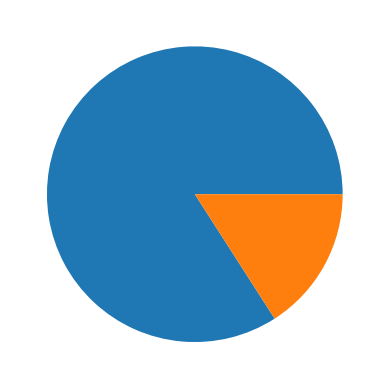

In [24]:
plt.pie([frequencyOfSprawls[sprawls < 10000].sum(), frequencyOfSprawls[sprawls > 10000].sum()])

(-1.1065000028095735,
 1.105306159402304,
 -1.110082293051863,
 1.1933025730850848)

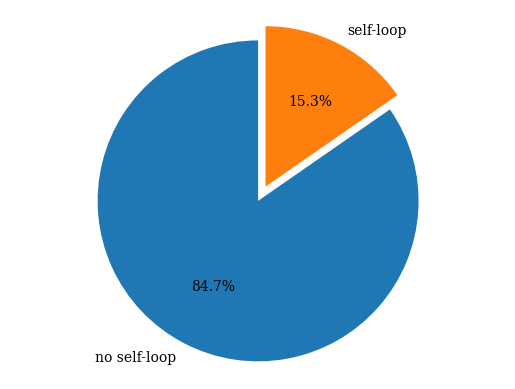

In [238]:
subData = data[data[:,0] != 0, :]

sizes = [(data[:,1] == 0).sum(), (data[:,1] == 1).sum()]
labels = 'no self-loop', 'self-loop'
explode = 0, 0.1
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90,  textprops={'fontsize': 10, 'fontfamily': 'serif', 'color': 'black'})
ax.axis('equal') 

In [239]:
sprawl_loop = np.unique(data[:,0]).reshape(-1, 1)*np.flip(np.arange(2)).reshape(1,-1)
sprawl_loop = np.vstack((sprawl_loop, sprawl_loop + np.arange(2)))
#print(sprawl_loop)

In [240]:
frequencyOfSprawlLoop = ((data[:,0].reshape(-1,1) == sprawl_loop[:,0].reshape(1,-1))*(data[:,1].reshape(-1,1) == sprawl_loop[:,1].reshape(1,-1))).sum(axis = 0)

In [241]:
np.all(frequencyOfSprawlLoop[:frequencyOfSprawls.shape[0]] + frequencyOfSprawlLoop[frequencyOfSprawls.shape[0]:] == frequencyOfSprawls)

True

In [242]:
sprawl_loop[:5]

array([[0, 0],
       [1, 0],
       [2, 0],
       [3, 0],
       [4, 0]])

In [247]:
Y = []
for i in range(sprawls.shape[0]):
    Y.append((frequencyOfSprawlLoop[frequencyOfSprawls.shape[0]+i:].sum()/frequencyOfSprawls[i:].sum()))

Text(0.5, 0.98, 'Percentage of words with self-loop above transitive closure threshold')

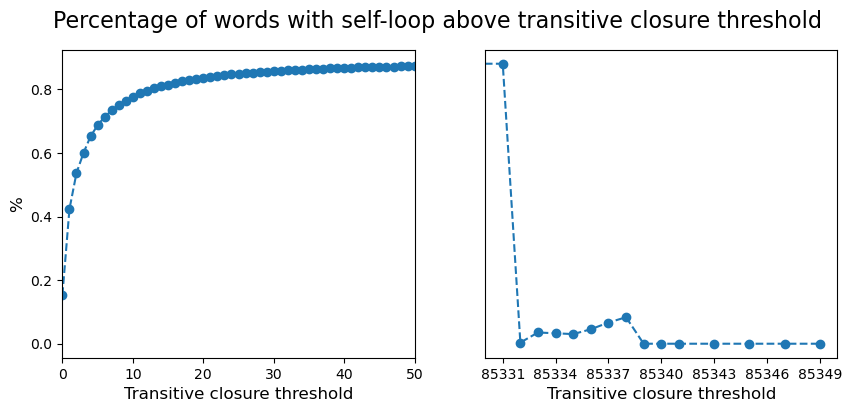

In [267]:

fig, ax = plt.subplots(1, 2, figsize = (10,4))
ax[0].plot(sprawls,Y, 'o--')
ax[0].set_xlim([0, 50])
ax[0].set_xlabel("Transitive closure threshold", fontsize=12)
ax[0].set_ylabel("%", fontsize=12)
ax[1].plot(sprawls, Y, 'o--')
ax[1].set_xlim([85330, 85349+1])
ax[1].set_yticks([])
ax[1].set_xticks(np.arange(85330+1, 85349+1, 3))
ax[1].set_xlabel("Transitive closure threshold", fontsize=12)
fig.suptitle('Percentage of words with self-loop above transitive closure threshold', fontsize=16)

<h3>Crawled graph of the word 'kanonik'</h3>

In [109]:
import json
def translateLinkToWord(link):
    with open(link[1:]+'.json', 'r') as f:
        content = json.loads(f.read())
    return content['name']

In [124]:
for i in np.arange(data.shape[0])[(data[:,0] == 8) *( data[:,1] == 1)]:
    print(content[i].rstrip('\n'))

('/wiki/Alba%C5%84czyk', 8, True)
('/wiki/alba%C5%84ski', 8, True)
('/wiki/Antigua_i_Barbuda', 8, True)
('/wiki/audycja_telewizyjna', 8, True)
('/wiki/Azer', 8, True)
('/wiki/azerski', 8, True)
('/wiki/Biriusa', 8, True)
('/wiki/Czuna', 8, True)
('/wiki/Fin', 8, True)
('/wiki/fi%C5%84ski', 8, True)
('/wiki/franciszkanka', 8, True)
('/wiki/franciszka%C5%84ski', 8, True)
('/wiki/Otwock', 8, True)
('/wiki/kolegiata', 8, True)
('/wiki/Islandczyk', 8, True)
('/wiki/islandzki', 8, True)
('/wiki/Tasiejewa', 8, True)
('/wiki/Trydent', 8, True)
('/wiki/Saint_John%27s', 8, True)
('/wiki/magada%C5%84ski', 8, True)
('/wiki/o%C5%9Brodek_telewizyjny', 8, True)
('/wiki/Magadan', 8, True)
('/wiki/otwocki', 8, True)
('/wiki/trydencki', 8, True)
('/wiki/kolegiacki', 8, True)
('/wiki/kanonik', 8, True)
('/wiki/stacja_telewizyjna', 8, True)
('/wiki/program_telewizyjny', 8, True)


In [125]:
subGraph = nx.DiGraph()
origin = '/wiki/kanonik'
queue = list(wordGraph.predecessors(origin))
queue = list(zip(queue, [origin]*len(queue)))
edges = queue.copy()
print(queue)
while queue:
    edge = queue.pop()
    predec = list(wordGraph.predecessors(edge[0]))
    predec = list(zip(predec, [edge[0]]*len(predec)))
    for predec_edge in predec:
        if not predec_edge in edges:
            edges.append(predec_edge)
            queue.append(predec_edge)
    subGraph.add_edge(translateLinkToWord(edge[0]), translateLinkToWord(edge[1]))

[('/wiki/kolegiata', '/wiki/kanonik'), ('/wiki/kustosz', '/wiki/kanonik')]


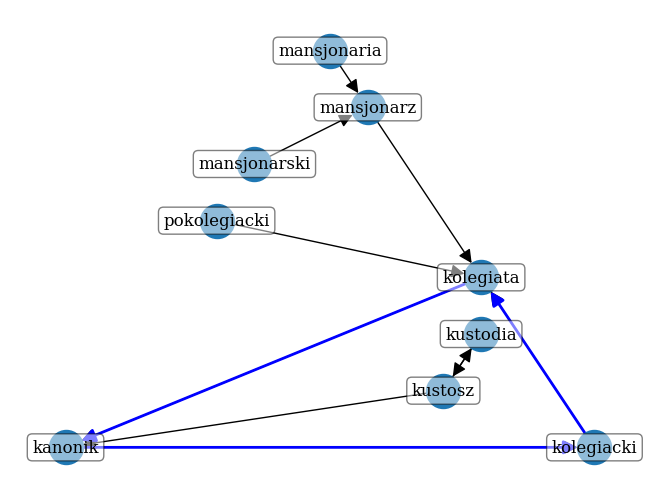

In [156]:
pos = nx.planar_layout(subGraph)
node_size = 600
nx.draw(subGraph, font_family = 'serif', bbox=dict(boxstyle="round", facecolor='white', alpha=0.5),horizontalalignment='center', pos = pos, with_labels = True, node_size = node_size, node_shape = 'o', arrowsize = 20)
path = np.array([pos['kanonik'], pos['kolegiata'], pos['kolegiacki'], pos['kanonik']])

nx.draw_networkx_edges(subGraph, pos = pos, node_size = node_size, node_shape = 'o', edge_color = 'blue', width = 2, arrows = None, arrowsize = 20, edgelist = [('kolegiata', 'kanonik'), ('kolegiacki', 'kolegiata'), ('kanonik', 'kolegiacki')])
#plt.plot(path[:,0], path[:, 1], color = 'red')

<h3>Finding the unique nodes</h3>

In [89]:
def firstDegreeIdData(node):
    idData = []
    idData.append(len(list(wordGraph.predecessors(node))))
    idData.append(len(list(wordGraph.successors(node))))
    try:
        idData.append(dataDict[node][0])
    except:
        idData.append(-1)
    try:
        idData.append(dataDict[node][1]*1)
    except:
        idData.append(-1)
        
    outIn = 0
    outInNeighbors = set([])
    
    outOut = 0
    outOutNeighbors = set([])
    for neighbor in wordGraph.successors(node):
        for sub in wordGraph.predecessors(neighbor):
            outInNeighbors.add(sub)
            outIn += 1
        
        for sub in wordGraph.successors(neighbor):
            outOutNeighbors.add(sub)
            outOut += 1
    
    outOutNeighbors = len(outOutNeighbors)
    outInNeighbors = len(outInNeighbors)
    
    idData.append(outIn)
    idData.append(outInNeighbors)
    
    idData.append(outOut)
    idData.append(outOutNeighbors)
    
    return idData

In [90]:

identificationData = {}
for i, node in enumerate(wordGraph.nodes):
    idData = firstDegreeIdData(node)
    '''
    predecessorsData = []
    for predec in wordGraph.predecessors(node):
        predecessorsData.append(firstDegreeIdData(predec))
    idData.append(predecessorsData)
    
    successorsData = []
    for predec in wordGraph.successors(node):
        successorsData.append(firstDegreeIdData(predec))
    idData.append(successorsData)
    '''
    
    identificationData[node] = idData
    
    if i % 5000 == 0: print(i)

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000


In [94]:

idData = np.array(list(identificationData.values()))
#idData[idData == False] = 0
#idData[idData == True] = 1
idData.shape

(101258, 8)

In [122]:
uniques = np.unique(idData, axis = 0)

In [126]:
np.all(idData == uniques[2], axis = 1).sum()

56

In [127]:
uniquesFrequency = []
for i in range(uniques.shape[0]):
    if i % 5000 == 0: print(i)
    freq = np.all(idData == uniques[i], axis = 1).sum()
    uniquesFrequency.append(freq)
uniquesFrequency = np.array(uniquesFrequency)

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000


In [134]:
np.unique(uniquesFrequency)

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   31,   32,   33,   34,
         36,   37,   38,   39,   40,   41,   42,   43,   44,   47,   48,
         50,   51,   54,   56,   57,   58,   59,   60,   61,   62,   70,
         71,   72,   74,   75,   82,   83,   84,   86,   88,   91,   93,
         97,  116,  120,  122,  127,  143,  170,  197,  205,  233,  234,
        238,  247,  250,  258,  311,  312,  677,  947, 9670])

In [141]:
print((uniquesFrequency == 1).sum(), (uniquesFrequency != 1).sum())

67991 4246


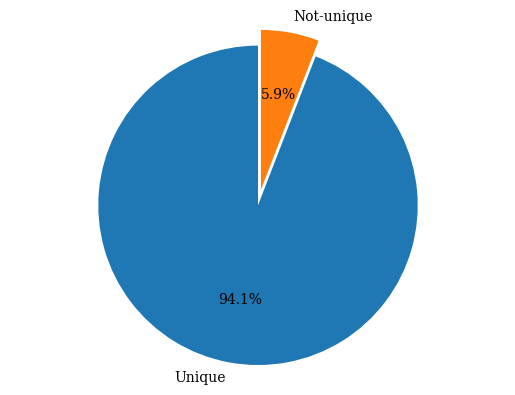

In [153]:
fig, ax = plt.subplots()
#ax.pie([(uniquesFrequency == 1).sum(), (uniquesFrequency != 1).sum()])

labels = 'Unique', 'Not-unique'
sizes = [(uniquesFrequency == 1).sum(), (uniquesFrequency != 1).sum()]
explode = (0., 0.1) 

ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90,  textprops={'fontsize': 10, 'fontfamily': 'serif', 'color': 'black'})
ax.axis('equal')  

plt.show()

<h3>Examples of uniqueness of nodes in the graph of the Wiktionary</h3>

In [193]:
exampleUniqueness = nx.DiGraph()
exampleUniqueness.add_edge('1', '2')
exampleUniqueness.add_edge('2', '3')
exampleUniqueness.add_edge('3', '1')

In [194]:
posExample = nx.planar_layout(exampleUniqueness)

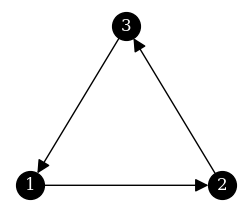

In [222]:
fig, ax = plt.subplots(1,1,figsize = (3,2.5))
nx.draw(exampleUniqueness, node_size = 400, arrowsize = 20, node_color = 'black', font_color = 'white', pos = posExample, with_labels = True, font_family = 'serif',horizontalalignment='center')

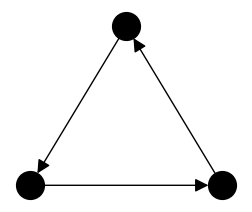

In [223]:
fig, ax = plt.subplots(1,1,figsize = (3,2.5))
nx.draw(exampleUniqueness, node_size = 400, node_color = 'black', font_color = 'white', arrowsize = 20, pos = posExample, with_labels = False, font_family = 'serif',horizontalalignment='center')

In [224]:
exampleUniqueness = nx.DiGraph()
exampleUniqueness.add_edge('1', '2')
exampleUniqueness.add_edge('2', '3')
exampleUniqueness.add_edge('2', '4')
exampleUniqueness.add_edge('3', '4')

In [225]:
posExample = nx.planar_layout(exampleUniqueness)

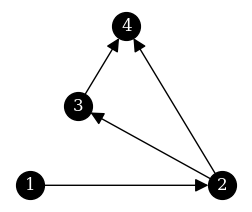

In [226]:
fig, ax = plt.subplots(1,1,figsize = (3,2.5))
nx.draw(exampleUniqueness, node_size = 400, arrowsize = 20, node_color = 'black', font_color = 'white', pos = posExample, with_labels = True, font_family = 'serif',horizontalalignment='center')

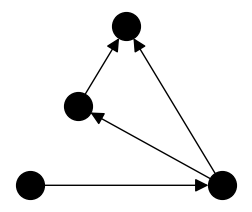

In [227]:
fig, ax = plt.subplots(1,1,figsize = (3,2.5))
nx.draw(exampleUniqueness, node_size = 400, node_color = 'black', font_color = 'white', arrowsize = 20, pos = posExample, with_labels = False, font_family = 'serif',horizontalalignment='center')